# Машинное обучение, DS-поток
## Задание ML.1

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 30 баллов;
* Задача 3 &mdash; 70 баллов;
* Задача 4 &mdash; 80 баллов.

----

In [1]:
# Bot check

# HW_ID: ds_ml1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

from sklearn.base import BaseEstimator

---
## Задача 1.

Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор для Ridge-регрессии. Что можно сказать о влиянии параметра регуляризации?

Вычислим проксимальный оператор для $l_2$-нормы.

$$
\mathrm{prox}_{\alpha ||\cdot||_2^2}(x)=\arg\min_\theta \left(||\theta||_2^2+\frac{1}{2\alpha}||\theta-x||_2^2\right)=\arg\min_\theta \left(
\sum_{i=1}^d\theta_i^2+\frac{(\theta_i-x)^2}{2\alpha}\right)
$$

Теперь мы можем провести одномерную оптимизацию:

$$
\mathrm{prox}_{\eta ||\cdot||_2^2}(x)_i=\arg\min_\theta\left(\frac{{x_i}^2-2x_i \theta_i+2\eta\theta_i^2+\theta_i^2}{2\eta}\right)=\frac{2x}{2\eta+1}
$$

Запишем итеративную формулу, использовав $\nabla ||y-X\theta_k||_2^2=2X^T(X\theta_k-y)$:

$$
\theta_{k+1}=\mathrm{prox}_{\eta\alpha ||\cdot||_2^2}(\theta_k-\eta\nabla ||y-X\theta_k||_2^2)=\frac{2(\theta_k-2\eta X^T (X\theta_k - y))}{2\eta\alpha + 1}
$$

---
## Задача 2.

Исследуем Elastic-регрессию.

**1.** Визуализируйте множество, которое ограничивает коэффициенты в Elastic-регрессии.

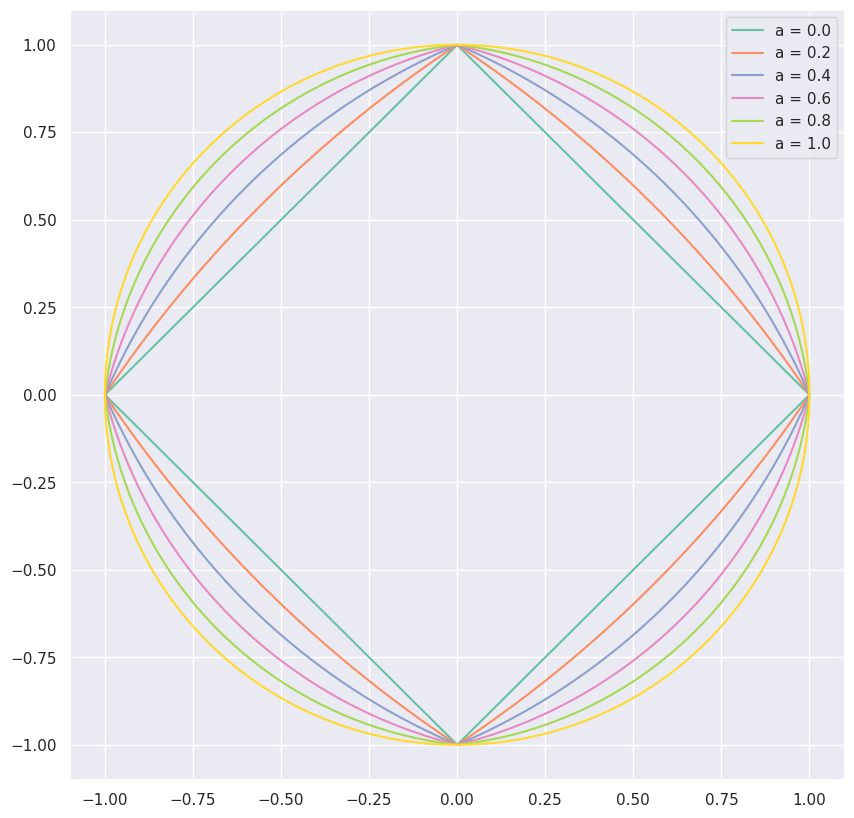

In [3]:
from math import pi

t = np.arange(0.0, 2 * pi, 1e-3)

plt.figure(figsize=(10, 10))
x = []
y = []
for t in np.arange(0.0, 2 * pi, 1e-3):
    r = 1.0 / (np.abs(np.cos(t)) + np.abs(np.sin(t)))
    x.append(r * np.cos(t))
    y.append(r * np.sin(t))
plt.plot(x, y, label='a = 0.0')

for a in np.arange(0.2, 1.1, 0.2):
    x = []
    y = []
    for t in np.arange(0.0, 2 * pi, 1e-3):
        b = np.abs(np.cos(t)) + np.abs(np.sin(t))
        r = (a * b - b + np.sqrt((a * b) ** 2 - 2 * a * b ** 2 + 4 * a + b ** 2)) / (2 * a)
        x.append(r * np.cos(t))
        y.append(r * np.sin(t))
    plt.plot(x, y, label="a = %.1f" % a)

plt.legend()
plt.show()

**2.** Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор.

Какой вы можете видеть эффект при изменении параметра регуляризации и в чем
его отличие от лассо-регрессии?

$$
\mathrm{prox}_{\eta(\alpha_1 ||\cdot||_2^2+\alpha_2 ||\cdot||_1)}(x)=\arg\min_\theta\left(\sum_{i=1}^d \alpha_1\theta_i^2+\alpha_2|\theta_i|+\frac{(\theta_i-x)^2}{2\eta}\right)
$$

$$
\arg\min_\theta\left(\alpha_1\theta_i^2+\alpha_2|\theta_i|+\frac{(\theta_i-x)^2}{2\eta}\right)=\frac{2x-2\alpha_2\eta}{2\alpha_1+1}
$$

$$
\theta_{k+1}=\mathrm{prox}_{\eta(\alpha_1 ||\cdot||_2^2+\alpha_2 ||\cdot||_1)}(\theta_k-\nabla||y-X\theta_k||_2^2)=\frac{2(\theta_k-2\eta X^T (X\theta_k - y))-2\alpha_2\eta}{2\alpha_1+1}
$$

**3.** Выпишите формулы для градиентного и стохастического спуска

Градиентный спуск:

$$
\theta_{k+1}=\theta_k-\eta\nabla (||y-X\theta_k||_2^2+\alpha_1||\theta_k||_1+\alpha_2||\theta_k||_2^2)=\theta_k-\eta(2X^T X\theta_k-2X^T y+2\alpha_2 \theta_k+\alpha_1\mathrm{sgn}(\theta_k))
$$

Для стохастического выбираем слйчайным образом одну строку данных.

---
## Задача 3.

Вам предлагается сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://dasl.datadescription.com/datafile/cost-of-living-2018/?_sfm_cases=539+541">`cost of living 2018`</a>, в которых используйте следующие столбцы:
* `City` &mdash; город, данные для которого приводятся.
* `Cost of Living Index` &mdash; является относительным показателем цен на потребительские товары, включая продукты, рестораны, транспорт и коммунальные услуги. Cost of Living Index не включает расходы на проживание, такие как аренда или ипотека. Если город имеет индекс стоимости жизни 120, это означает, что Numbeo оценивает его на 20% дороже, чем Нью-Йорк.

* `Rent Index` &mdash; это оценка цен на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, Numbeo оценивает, что цена аренды в этом городе в среднем на 20% меньше, чем цена в Нью-Йорке.

* `Cost of Living Plus Rent Index` &mdash; это оценка цен на потребительские товары, включая арендную плату, по сравнению с Нью-Йорком.

* `Restaurant Price Index` &mdash; сравнение цен на блюда и напитки в ресторанах и барах по сравнению с Нью-Йорк.

* `Local Purchasing Power Index` &mdash; показывает относительную покупательную способность при покупке товаров и услуг в данном городе за среднюю заработную плату в этом городе. Если внутренняя покупательная способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой по Нью-Йорку.

* `Groceries Index` &mdash; это оценка цен на продукты в городе по сравнению с Нью-Йорком. Для расчета этого раздела Number использует веса товаров в разделе "Рынки" для каждого города.

In [2]:
data = pd.read_csv('cost-of-living-2018.txt', sep='\t')
data = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
    'Groceries Index'
]]

data.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Restaurant Price Index,Local Purchasing Power Index,Groceries Index
0,145.43,110.87,128.76,158.75,112.26,143.47
1,141.25,66.14,105.03,135.76,142.70,149.86
2,134.83,71.70,104.38,129.74,130.96,138.98
3,130.68,49.68,91.61,127.22,139.01,127.54
4,128.03,43.57,87.30,119.48,112.71,132.70


**1.** Задача заключается в построении предсказания `Groceries Index` по известным значениям остальных параметров. Разделите данные на признаки $X$ и таргет $y$.

In [3]:
X = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
]]
y = data['Groceries Index']

Разбейте данные на обучающую и тестирующие выборки в соотношении 7:3 с помощью `train_test_split`</a> из sklearn. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** Стандартизация признаков исключает ситуацию, когда "значимость" признака оказывается зависящей от разброса его значений.

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, **обученный на обучающей выборке**.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
y_mean = np.mean(y_train)
y_train_std = y_train - y_mean
y_test_std = y_test - y_mean

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Для Elastic также исследуйте зависимость от параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

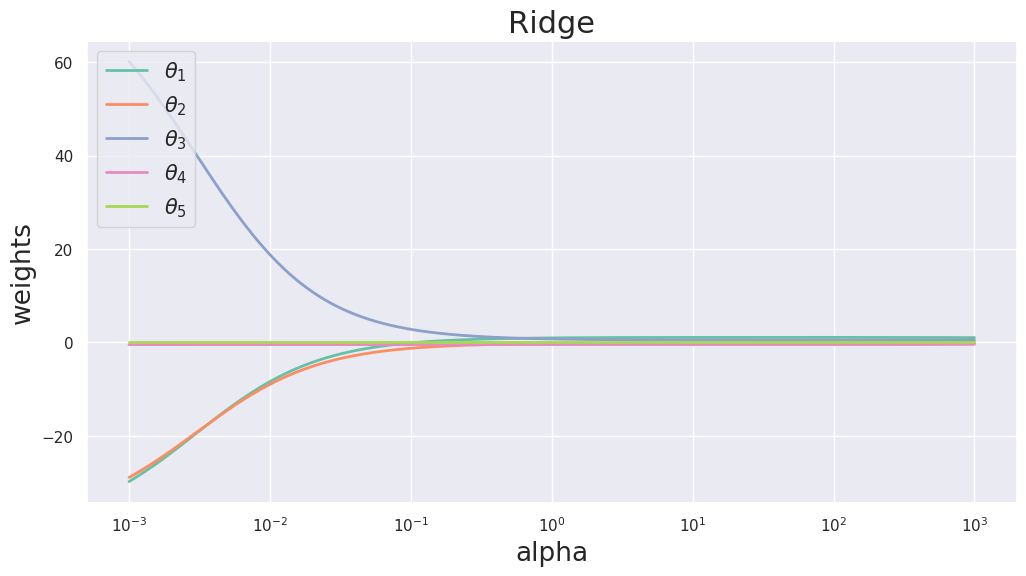

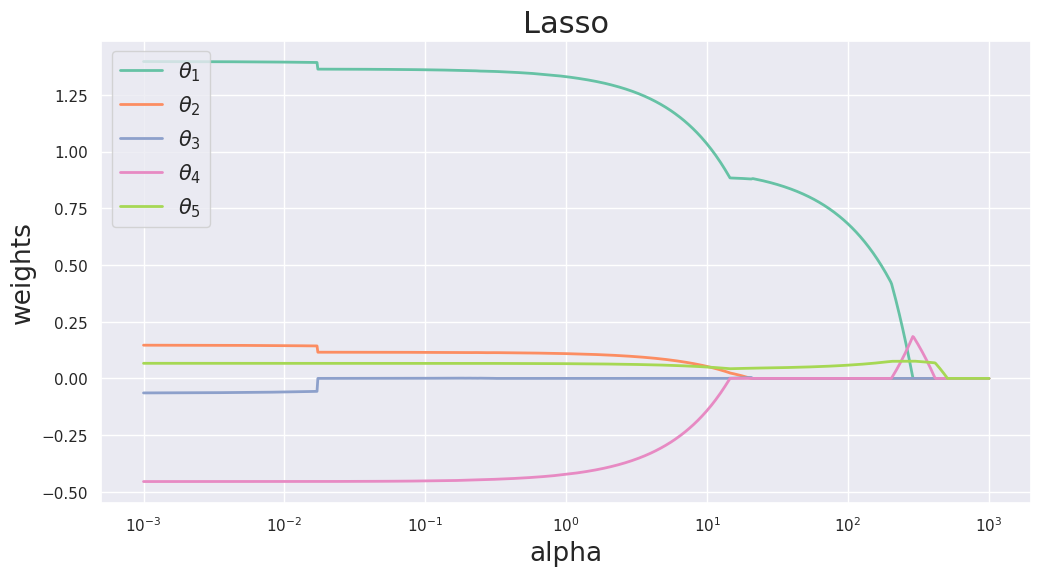

/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.443e+03, tolerance: 1.742e+01
  model = cd_fast.enet_coordinate_descent(
/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.409e+03, tolerance: 1.742e+01
  model = cd_fast.enet_coordinate_descent(
/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

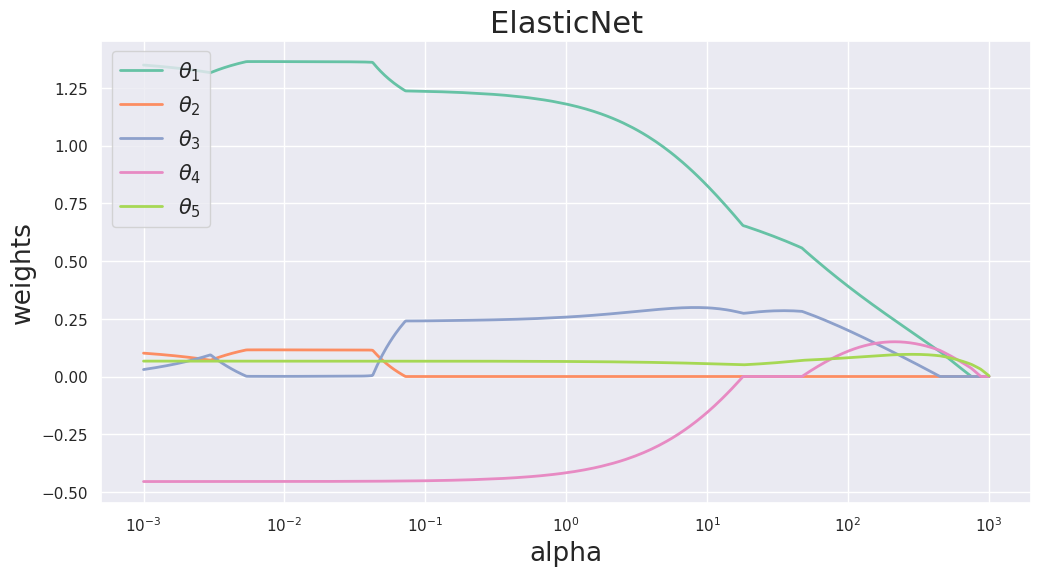

In [7]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def draw_track(model, X, y, log_min, log_max, num, title='', figsize=(12, 6)):
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    :param model: модель
    :param X: регрессоры
    :param y: отклик
    :param log_min: десятичный логарифм 
        минимального значения коэффициента регуляризации
    :param log_max: десятичный логарифм 
        максимального значения коэффициента регуляризации
    :param num: количество элементов в сетке для коэффициента регуляризации
    :param title: заголовок графика
    :param figsize: размер полотна
    """
    
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        coefs.append(model.coef_)

    plt.figure(figsize=figsize)
    ax = plt.gca()
#     ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('log')
#     ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha', fontsize=19)
    plt.ylabel('weights', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=15)
    plt.axis('tight')
    plt.show()

draw_track(Ridge(max_iter=10000), X_train, y_train, -3, 3, 1000, 
           title='Ridge')
draw_track(Lasso(max_iter=10000), X_train, y_train, -3, 3, 1000, 
           title='Lasso')
draw_track(ElasticNet(l1_ratio=1/3, max_iter=10000), X_train, y_train, -3, 3, 1000, 
           title='ElasticNet')

Расчитайте индекс обусловленности для МНК-решения. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии. 

In [12]:
print(np.round(np.sqrt(np.linalg.cond(X_train_std.T @ X_train_std)), 3))

13000.165


Индекс обусловленности очень большой, что означает мультиколлинеарность данных.

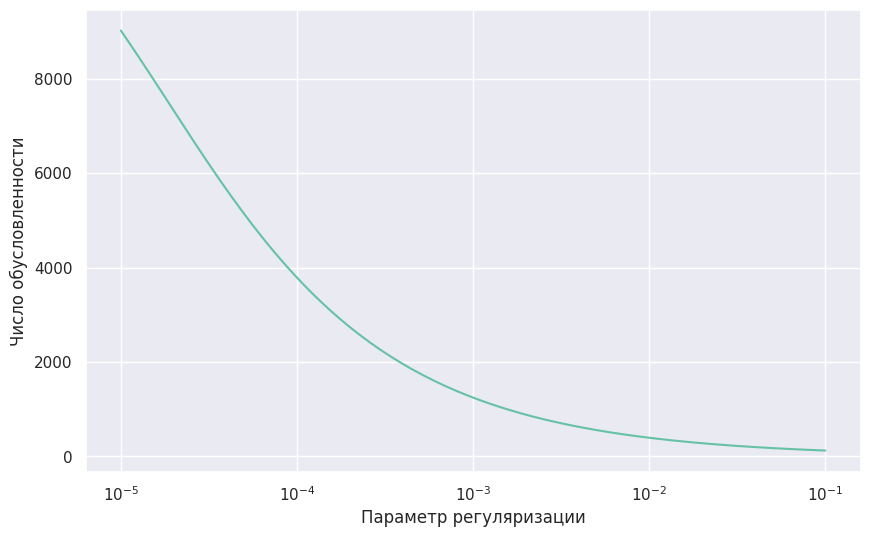

In [17]:
alphas = np.logspace(-5, -1, 200)   
plt.figure(figsize=(10,6))
ax = plt.gca()

ci_list = []
for alpha in alphas:
    ci_list += [np.sqrt(np.linalg.cond(X_train_std.T @ X_train_std + alpha * np.eye(X_train_std.shape[1])))]

ax.set_xscale('log')
plt.plot(alphas, ci_list)
plt.xlabel('Параметр регуляризации')
plt.ylabel('Число обусловленности')
plt.axis('tight')
plt.show()

**3.** На обучающей выборке с помощью поиска по сетке определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE).

*Замечание.* Не забудьте, что при стандартизации была использована вся обучающая выборка, а внутри кросс-валидации на каждой итерации рассматривается своя валидационная выборка, которая не должна стандартизироваться по данным, посчитанным частично на ней самой. Вам может помочь [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Используйте его в качестве аргумента model

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

pipe_ridge = Pipeline(
    [
        ('scale', StandardScaler()),
        ('optimize', Ridge(max_iter=1000)),
    ]
)

param_grid = {
    "optimize__alpha": np.logspace(-3.0, 3.0, num=100)
}

grid_search_ridge = GridSearchCV(pipe_ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

grid_search_ridge.best_params_

{'optimize__alpha': np.float64(0.6135907273413176)}

In [19]:
import warnings
warnings.filterwarnings('ignore')

pipe_lasso = Pipeline(
    [
        ('scale', StandardScaler()),
        ('optimize', Lasso(max_iter=1000)),
    ]
)

grid_search_lasso = GridSearchCV(pipe_lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

grid_search_lasso.best_params_

{'optimize__alpha': np.float64(0.024770763559917114)}

In [20]:
pipe_elastic = Pipeline(
    [
        ('scale', StandardScaler()),
        ('optimize', ElasticNet(max_iter=1000)),
    ]
)

param_grid["optimize__l1_ratio"] = np.linspace(0.0, 1.0, num=20)

grid_search_elastic = GridSearchCV(pipe_elastic, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_elastic.fit(X_train, y_train)

grid_search_elastic.best_params_

{'optimize__alpha': np.float64(0.01873817422860384),
 'optimize__l1_ratio': np.float64(0.9473684210526315)}

На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

In [22]:
from sklearn.metrics import mean_squared_error

print('Ridge: %.2f' % mean_squared_error(grid_search_ridge.predict(X_test), y_test))
print('Lasso: %.2f' % mean_squared_error(grid_search_lasso.predict(X_test), y_test))
print('ElasticNet: %.2f' % mean_squared_error(grid_search_elastic.predict(X_test), y_test))


Ridge: 33.66
Lasso: 33.57
ElasticNet: 33.68


**4.** Сделайте общий вывод по задаче.

**Вывод:** В данном случае модели дали примерно одинаковые результаты в отношении качества, а регуляризация позволила избежать проблемы мультиколлинеарности.

---
## Задача 4.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс, например, в `GridSearchCV`.

**1.** Задача оптимизации для регрессии Хьюбера выглядит следующим образом:
$$\large{\sum_{i=1}^n R(Y_i - x_i^T\theta) \rightarrow \min_\theta},$$
где $R(x) = \frac{x^2}{2} I\{|x| < c\} + c (|x| - \frac{c}{2})I\{|x| > c\}$ &mdash; функция потерь Хьюбера.

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

$$
\partial_\theta R(Y_i-x_i^T\theta)=\left\{\begin{array}{ll}
    -x_i (Y_i-x_i^T \theta), & |Y_i-x_i^T\theta| < c \\
    -cx_i\cdot \mathrm{sgn}\,(Y_i - x_i^T \theta), & |Y_i-x_i^T\theta| \ge c
\end{array}\right.
$$

Градиентный спуск:

$$
\theta_{k+1}=\theta_k - \eta\sum_{i=1}^n\partial_\theta R(Y_i-x_i^T \theta)
$$

**2.** Реализуем теперь класс

In [42]:
class HuberRegression(BaseEstimator):
    '''
    Класс, реализующий линейную регрессию, используя функцию потерь Хьюбера.
    '''
    
    def __init__(self, c=1, fit_intercept=True, max_iter=100, lr=0.01):
        '''
        :param c: константа c из определения функции потерь Хьюбера
        :param fit_intercept: добавлять ли константный признак
        :param max_iter: макс. количество итераций процедуры оптимизации
        :param lr: скорость обучения
        '''
        
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.lr = lr    
        
    def fit(self, X, y):
        '''
        Функция обучения модели.
        
        :param X: матрица признаков
        :param y: значения целевой паременной
        '''

        train_size, num_features = X.shape
        
        if self.fit_intercept:
            X = np.hstack((np.ones((train_size, 1)), X))
            num_features += 1
        
        self.theta = np.zeros(num_features)
        
        for _ in range(self.max_iter):
            less_c_indices = np.abs(y - X @ self.theta) < self.c
            grad = np.zeros_like(self.theta)

            grad += X[less_c_indices, :].T @ (
                y[less_c_indices] - \
                X[less_c_indices, :] @ self.theta
            )
            grad += self.c * X[~less_c_indices, :].T @ np.sign(
                y[~less_c_indices] - \
                X[~less_c_indices, :] @ self.theta
            )
            # обновляем параметры
            self.theta += self.lr * grad
        return self
        
    def predict(self, X):
        '''
        Функция применения модели.
        
        :param X: матрица признаков.
        :return pred: предсказание отклика для объектов из X
        '''
        if self.fit_intercept:
            X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
            
        pred = X @ self.theta
        return pred

**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [24]:
train_data = pd.read_csv('train.csv', sep=',')
test_data = pd.read_csv('test.csv', sep=',')

train_data.head()

,feature_1,feature_2,feature_3,target
0,2.320800,-1.098571,0.117091,162.910894
1,0.625119,-0.782367,-0.813596,21.113006
2,-0.807648,-0.185054,-1.446535,-36.128990
3,-0.291837,-1.616474,-0.761492,-56.474495
4,0.938747,0.087531,0.607112,189.589573


Посмотрите на зависимость целевой переменной от каждого признака. Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

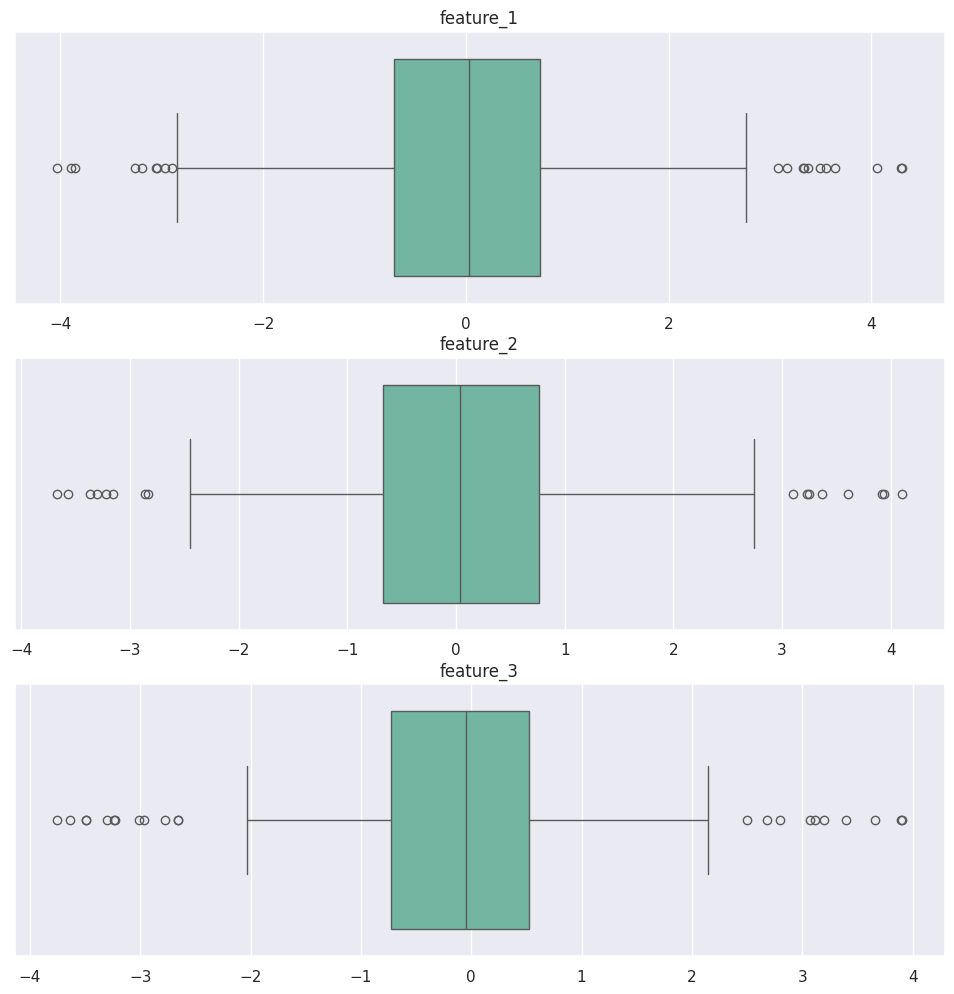

In [27]:
features = train_data.drop('target', axis=1).columns
target = 'target'

plt.figure(figsize=(12, len(features) * 4))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=train_data[feature], orient='h')
    plt.title(f'{feature}')
    plt.xlabel('')

plt.show()

На графиках можно увидеть наличие существенного числа выбросов, которые, скорее всего, "сломают" линейную регрессию.

**4.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). Что можно сказать о качестве нашей модели?

In [31]:
from sklearn.linear_model import LinearRegression

X_train = train_data[[
    'feature_1',
    'feature_2',
    'feature_3'
]]
y_train = train_data['target']

X_test = test_data[[
    'feature_1',
    'feature_2',
    'feature_3'
]]
y_test = test_data['target']

lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
print('MSE на линейной регрессии: %.2f' % mean_squared_error(y_test, lin_reg.predict(X_test)))

MSE: 17025.81


Линейная модель в данном случае работает очень плохо, что связано с выбросами.

**5.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE. Что изменилось? 

In [44]:
hubert_reg = HuberRegression(c=10)
hubert_reg.fit(X_train, y_train)
print('MSE на регрессии Хьюбера: %.2f' % mean_squared_error(y_test, hubert_reg.predict(X_test)))

MSE на регрессии Хьюбера: 170.73


Значение ошибки уменьшилось на два порядка даже без подбора гиперпараметра.

**6.** Используя поиск по сетке, подберите оптимальное значение гиперпараметра $c$ нашей модели. Какую метрику стоит использовать? Почему?

In [54]:
param_grid = {
    "c": np.linspace(0.01, 10, num=100),
}

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
hubert_reg = HuberRegression()
grid_search = GridSearchCV(hubert_reg, param_grid, cv=ss, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train, y_train)
print('C = %.2f' % grid_search.best_params_['c'])
print('MAPE = %.2f%%' % -grid_search.best_score_)

C = 1.83
MAPE = 0.62%


**7.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака. Что можно заметить на этих графиках?.

In [62]:
def plot_feature(feature):
    plt.scatter(X_train[feature], y_train, label=f"{feature} (true)")
    plt.scatter(X_train[feature], grid_search.predict(X_train), label=f"{feature} (hubert)")
    plt.scatter(X_train[feature], lin_reg.predict(X_train), label=f"{feature} (linear)")

    plt.xlabel(feature)
    plt.ylabel('target')
    plt.legend()
    plt.show()

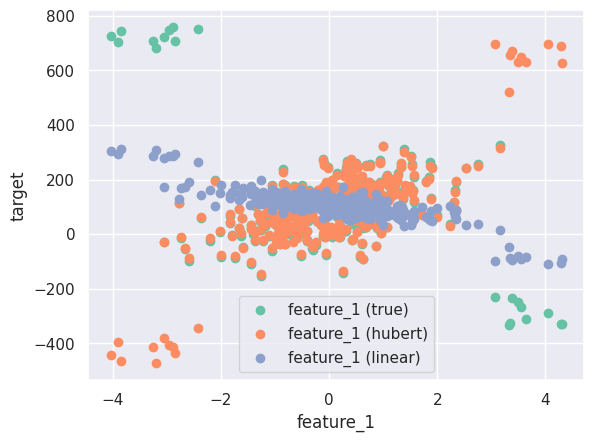

In [63]:
plot_feature('feature_1')

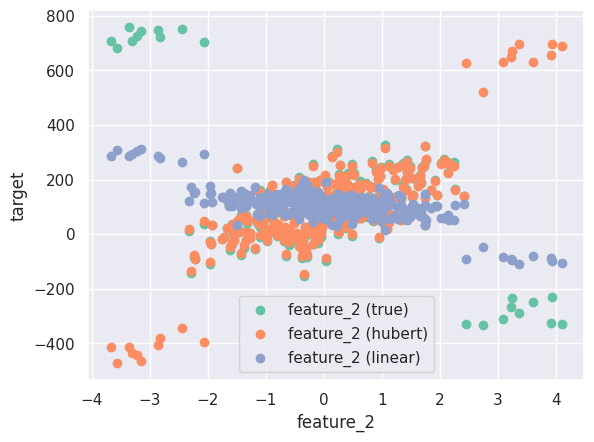

In [64]:
plot_feature('feature_2')

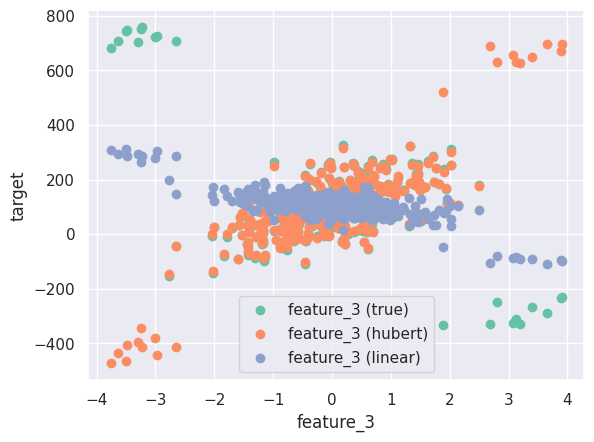

In [65]:
plot_feature('feature_3')

**Вывод:** В данном случае регрессия Хьюбера дала существенно более лучшие результаты - за счёт своих свойств она способна куда лучше обрабатывать выбросы и в целом значения, отклоняющиеся от линейной зависимости. Ещё более лучших результатов можно достичь подбором гиперпараметра. Такие результаты связаны с формой оптимизируемого функционала, который на больших значениях отклонения позволяет изменять параметры на большую величину.